# Regresión Logística: Predicción de Enfermedad Coronaria

A continuación se observa un problema de clasificación binaria y se desea analizar una posible solución a partir de un modelo de regresión logística. Se busca implementar el algoritmo mencionado, inicialmente empleando la librería SciKit-Learn para luego desarrollar el mismo proceso de entrenamiento manualmente (Descenso de Gradiente Estocástico).

También se introducirán algunos conceptos para lidiar con datos desbalanceados como: matriz de confusión, curva ROC, y algunas otras métricas importantes.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.

La fecha límite de entrega es el día **20 de septiembre** y se realizará a través de Bloque Neón.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
from sklearn.preprocessing import binarize
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
heart_df=pd.read_csv("heartDisease/framingham.csv")
heart_df.dropna(axis=0,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
print(f'Se tienen {len(heart_df)} datos.')

Se tienen 3749 datos.


### Análisis de Distribución de Clases

En el diagrama a continuación puede observar un claro desbalanceo de los datos, en pasos posteriores hablaremos al respecto.

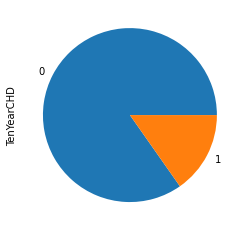

In [4]:
heart_df['TenYearCHD'].value_counts().plot(kind='pie')

## Descripción de Variables

Cada atributo es un factor potencial de riesgo. Existen factores demográficos, conductuales y médicos.

- Demográfico:

    - male: masculino (1) o femenino (0); (Nominal)

    - age: edad del paciente; (Continuo: aunque las edades registradas se han truncado a números enteros, el concepto de edad es continuo)

- Comportacional:

    - currentSmoker: si el paciente es o no fumador actual (nominal)

    - cigsPerDay: la cantidad de cigarrillos que la persona fumó en promedio en un día (se puede considerar continuo ya que uno puede tener cualquier cantidad de cigarrillos, incluso medio cigarrillo).

- Historia médica:

    - BPMeds: si el paciente estaba o no tomando medicación para la presión arterial (nominal)

    - prevalentStroke: si el paciente había tenido previamente un accidente cerebrovascular o no (nominal)

    - prevalentHyp: si el paciente era hipertenso (nominal)

    - diabetes: si el paciente tenía diabetes o no (nominal)

- Estado Médico actual:

    - totChol: nivel de colesterol total (continuo)

    - sysBP: presión arterial sistólica (continua)

    - diaBP: presión arterial diastólica (continua)

    - IMC: índice de masa corporal (continuo)

    - heartRate: frecuencia cardíaca (continua: en la investigación médica, variables como la frecuencia cardíaca, aunque de hecho son discretas, se consideran continuas debido a la gran cantidad de valores posibles).

    - glucose: nivel de glucosa (continuo)

- **Variable a Predecir**

    - TenYearCHD: Riesgo de padecer enfermedad coronaria 10 años en el futuro (binario: "1", significa "Sí", "0" significa "No")

In [5]:
x = heart_df.iloc[:,:-1]
y = heart_df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [6]:
#x = heart_df.values
scaler = MinMaxScaler()# Se usa un MinMaxScaler en esta ocasión #
x_train = scaler.fit_transform(x_train)  # Aplique el escalamiento #
#heart_df_scaled = pd.DataFrame(x_scaled, columns=heart_df.columns) # Conversión a un DataFrame #
#heart_df_scaled
x_test= scaler.transform(x_test)
x_test

array([[0.        , 0.13157895, 1.        , ..., 0.13194444, 0.21212121,
        0.11864407],
       [1.        , 0.26315789, 0.        , ..., 0.1359127 , 0.16161616,
        0.13559322],
       [1.        , 0.26315789, 0.        , ..., 0.18030754, 0.18181818,
        0.16101695],
       ...,
       [0.        , 0.94736842, 1.        , ..., 0.37599206, 0.36363636,
        0.12429379],
       [0.        , 0.07894737, 0.        , ..., 0.17361111, 0.31313131,
        0.12146893],
       [1.        , 0.47368421, 1.        , ..., 0.12574405, 0.36363636,
        0.12429379]])

## Parte 1

A continuación, debe utilizar la función `LogisticRegression` de SciKit-Learn para obtener un primer modelo de regresión logística y calcular su precisión a partir de la función `accuracy_score`.

Obtenga resultados sobre los datos de entrenamiento y los datos de prueba. Concluya al respecto.

In [7]:
logreg = LogisticRegression()# Modelo de Regresión Logística #
logreg.fit(x_train, y_train) # Entrenamiento sobre los Datos #
y_pred = logreg.predict(x_test) # Predicción de Etiquetas #

print(f'Precisión inicial: {accuracy_score(y_test, y_pred)} Recall: {sklearn.metrics.recall_score(y_test,y_pred)}')

Precisión inicial: 0.8466666666666667 Recall: 0.09016393442622951


### Matriz de Confusión

Como recordará, la información en este dataset no posee una distribución de clases balanceada. La matriz de confusión es una herramienta que permite analizar el comportamiento del modelo para estos datos.

Puede encontrar más información en este artículo: [Understanding Confusion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

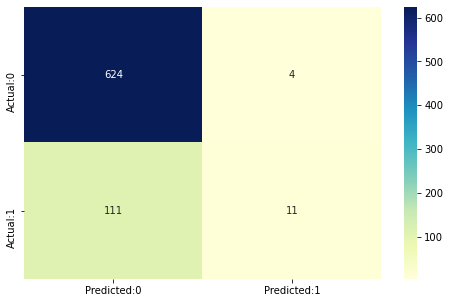

In [8]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Tratamiento de Datos Desbalanceados

En casos de estudio como identificación de tendencias patológicas, es común tener datos desbalanceados, o en los cuales la gravedad de cometer [errores tipo I o tipo II](https://www.simplypsychology.org/type_I_and_type_II_errors.html) son bastante diferentes. En muchos casos, se puede preferir cometer cierto tipo de error sobre el otro. Para trabajar con estos problemas, se suele preferir sacrificar algo de [precisión](https://developers.google.com/machine-learning/crash-course/classification/accuracy) del modelo, a cambio de una mejora en términos prácticos.

Este proceso se realiza a partir de la modificación del umbral a partir del cual se decide si un dato pertenece a una clase u otra. Utilice la función `binarize` para obtener valores de `0` ó `1` según las probabilidades de las predicciones realizadas utilizando la función `model.predict_proba`.

Algunas métricas utilizadas para interpretar el rendimiento del modelo son las siguientes:

- F1Score
- TP Rate / Recall / Sensitividad
- TN Rate / Especificidad

Puede encontrar más información sobre estas métricas en los artículos:
- [Accuracy, Precision, Recall or F1?](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)
- [Sensitivity Vs Specificity In Data Science](https://medium.com/fintechexplained/sensitivity-vs-specificity-in-data-science-2f673039dbd1)

In [9]:
umbrales = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8]# Vector que Contiene los Umbrales a Analizar #

for umbral in umbrales:
    cm2 = 0
    y_pred_prob_yes = logreg.predict_proba(x_test)# Utilice la función predict_proba para calcular las probabilidades de pertenecer a la clase 1 #
    y_pred2 = binarize(y_pred_prob_yes, threshold=umbral) # Utilice la función binarize para convertir las probabilidades a clases 0 y 1 #
    cm2 = confusion_matrix(y_test,y_pred2[:, 1])
    print(f'''->Para un umbral de {round(umbral,4)} tenemos esta matriz de confusión:
{cm2}
Con {cm2[0,0]+cm2[1,1]} predicciones correctas y {cm2[1,0]} falsos positivos.
Sensitividad (recall): {round(cm2[1,1]/(float(cm2[1,1]+cm2[1,0])), 4)} Especificidad: {round(cm2[0,0]/(float(cm2[0,0]+cm2[0,1])), 4)}\n''')


->Para un umbral de 0.1 tenemos esta matriz de confusión:
[[295 333]
 [ 21 101]]
Con 396 predicciones correctas y 21 falsos positivos.
Sensitividad (recall): 0.8279 Especificidad: 0.4697

->Para un umbral de 0.2 tenemos esta matriz de confusión:
[[498 130]
 [ 55  67]]
Con 565 predicciones correctas y 55 falsos positivos.
Sensitividad (recall): 0.5492 Especificidad: 0.793

->Para un umbral de 0.3 tenemos esta matriz de confusión:
[[581  47]
 [ 87  35]]
Con 616 predicciones correctas y 87 falsos positivos.
Sensitividad (recall): 0.2869 Especificidad: 0.9252

->Para un umbral de 0.4 tenemos esta matriz de confusión:
[[611  17]
 [104  18]]
Con 629 predicciones correctas y 104 falsos positivos.
Sensitividad (recall): 0.1475 Especificidad: 0.9729

->Para un umbral de 0.5 tenemos esta matriz de confusión:
[[624   4]
 [111  11]]
Con 635 predicciones correctas y 111 falsos positivos.
Sensitividad (recall): 0.0902 Especificidad: 0.9936

->Para un umbral de 0.6 tenemos esta matriz de confusión:
[

Por otra parte, un criterio que facilita el visualizar este trade-off se conoce como la Curva ROC, en donde se ubican múltiples puntos para distintos valores del umbral de clasificación. Puede leer el artículo a continuación para una explicación más detallada:
- Curva ROC: [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

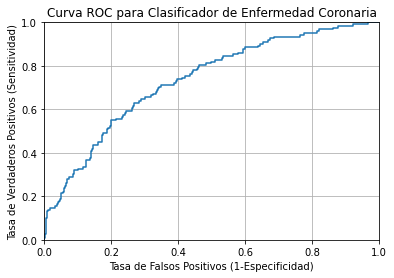

In [10]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC para Clasificador de Enfermedad Coronaria')
plt.xlabel('Tasa de Falsos Positivos (1-Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensitividad)')
plt.grid(True)

Observe la gráfica, y teniendo en cuenta los resultados concluya sobre la proporción que se puede considerar más adecuada en este contexto.
## Conclusiones


- Una matriz de confusión es un diagrama muy útil a la hora de visualizar la eficacia de un modelo de regresión logística para clasificación. Lo ideal es que la totalidad de los datos se encuentren en la diagonal en la cual toman el mismo valor tanto datos predichos como datos reales.
- Otro elemento que permite visualizar la eficacia de un modelo de regresión logísitica es la curva ROC, haciéndolo a partir de la tasa de verdaderos positivos y la tasa de falsos positivos. Esta curva permite definir si el modelo es eficiente conforme esta se aleje más de la recta de pendiente 1 entre los 2 ejes y se acerque más al eje de la tasa de verdaderos positivos (sensitividad/recall). 

- Para el modelo inicial, cuando no hay tratamiento de datos desbalanceados, se denota que hay muy buena precisión. Aún así, por el caso y tipo de datos tratados, es mas conveniente evaluar al modelo por el recall. Esta métrica evalúa el desempeño del modelo midiendo sobre el total de datos que si tenían riesgo, efectivamente fueron predecidos como con riesgo a la enfermedad. En este caso, este valor al ser tan pequeño (0.09), nos indica que no es el mejor modelo según ls circunstancias del negocio y los datos.
- Sabiendo que el modelo inicial no era conveniente, se procede a modificar el umbral sobre el cual se decide si un paciente tiene riesgo a padecer la enfermedad, con el objetivo de mejorar el recall del modelo. Con base en lo anterior, se puede observar que los modelos que mejor se ajustan a la realidad son los que poseen un umbral de 0.1 y 0.2. Esto es debido a que son los modelos que tienen un buen balance entre recall y la especificidad, que en el ámbito médico de los datos es muy importante. También se puede observar que su curva ROC tiene un comportamiento muy favorable al modelo, acercandose al eje de la sensitividad (recall). 
- También se puede visualizar que hay umbrales que efectúan un pésimo trabajo como modelos logísticos. Tal es el caso del último umbral cuya curva ROC tendería a ser una recta con pendiente 1 y es un modelo que clasifica el 100% de los datos en una clase haciendo que acierte en algunos pero se equivoque en otros. En este caso sería fatal porque no detectaría ningún caso de enfermedad coronaria poniendo en riesgo la vida de aquellos que si la poseen. 


# Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico para un modelo de regresión logística. Realice el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista errores se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

In [68]:
import random

np.random.seed(22)
X_train_array = np.c_[np.ones(x_train.shape[0]), x_train]
y_train_array = y_train.values

w0 = np.random.rand(X_train_array.shape[1]) # Inicialización de w aleatoria #

w = w0.copy()

i = random.randrange(0, X_train_array.shape[0]-1) # Posición aleatoria #
xActual = X_train_array[i] # X aleatorio de inicio.
yActual = y_train_array[i] # Y aleatorio de inicio.

# Función sigmoide para la clasificación
def sigma(w,x):
    res_sigmoid = 1/(1+np.exp(-np.dot(w,x))) # Salida de la función sigmoide #
    return res_sigmoid

tasas = np.array([0.1, 0.01, 0.001, 0.005, 0.0001])# Vector que contiene las tasas que van a probar #

tasas_preds = [] # Variable donde se guardarán las perdicciones del modelo con cada tasa.
errores_list = [] # Variable donde se guardarán todos los errores del modelo de todas tasa.
errores = [] # Variable donde se guardarán los errores del modelo con cada tasa.
probs_list = [] # Variable donde se guardarán las probabilidades de que la etiqueta sea 1 del modelo para todas las tasas.
probs = [] # Variable donde se guardarán las probabilidades de que la etiqueta sea 1 del modelo con cada tasa.
for tasa in tasas:
     
       
    w=np.random.rand(X_train_array.shape[1])
    for j in range (0, 100000):  # Criterio de parada por iteraciones #
        # # Desarrollo de algoritmo # #
        
        # Se calcula el gradiente con la función sigma
        g=sigma(w,xActual)
        
        # Se calcula el error y se añade a la lista
        E=g-yActual
        errores.append(E)
        
        # Se recalcula w
        w = w - tasa*(E*xActual)
        
        #Indice i aleatorio (estocástico) para actualizar xActual y Y¿yActual.
        i = random.randrange(0, X_train_array.shape[0]-1)
        #Se actualiza a un nuevo X de los datos de entrada
        xActual = X_train_array[i]
        #Se actualiza a un nuevo Y de los datos de entrada
        yActual = y_train_array[i]
        
        
        # # # # # # # # # # # # # # # #
    X_test_array = np.c_[np.ones(x_test.shape[0]), x_test]


    y_pred = np.zeros(len(x_test))
    
    errores_list.append(errores)
    errores = []
    # Se asigna la etiqueta de la variable objetivo a partir de los resultados y de un umbral
    for i in range(0,len(x_test)):
        prob = sigma(w,np.transpose(X_test_array[i]))
        probs.append(prob)
        if prob>0.15:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    probs_list.append(probs)
    probs = []
    tasas_preds.append(y_pred)
    
    # Se calculan las métricas de cada modelo
    print(f'Precisión modelo actual: {round(sklearn.metrics.accuracy_score(y_test,y_pred), 4)} Recall: {round(sklearn.metrics.recall_score(y_test,y_pred), 4)}')

Precisión modelo actual: 0.592 Recall: 0.7541
Precisión modelo actual: 0.6907 Recall: 0.6311
Precisión modelo actual: 0.6413 Recall: 0.5246
Precisión modelo actual: 0.6133 Recall: 0.7131
Precisión modelo actual: 0.3693 Recall: 0.7213


### Disminución del error
Se escogió un criterio de parada de tipo número de iteraciones. Allí, después de varias pruebas, se decidió dejar como valor 100 mil iteraciones con el ánimo de poder introducir un mayor rango de tasas de aprendizaje en los que su error converge. Además, se dejó un umbral bajo (de 0.15) para clasificar como riesgoso debido al contexto de los datos y la necesidad de un buen recall (sensitividad).

A continuación se muestra una gráfica donde se evidencia que el error del modelo va disminuyendo a medida que aumentan las iteraciones, lo cual es el objetivo de el método de descenso de gradiente estocástico. Para ello, se muestra el promedio móvil del error en el eje Y y su evolución en las iteraciones en el eje X.

De estas gráficas se puede concluir que, por ejemplo, en la primera la tasa de aprendizaje es muy grande, por lo que el error tiende a no converger y varía mucho. En el otro extremo, está la gráfica del modelo 5 en la cual la tasa de aprendizaje es tan pequeña que en las 100 mil iteraciones no logró llegar al punto mínimo y denota que podía seguir bajando el error.

Es por ello que, en primera instancia, se consideran de mejor calidad los modelos 2-4.

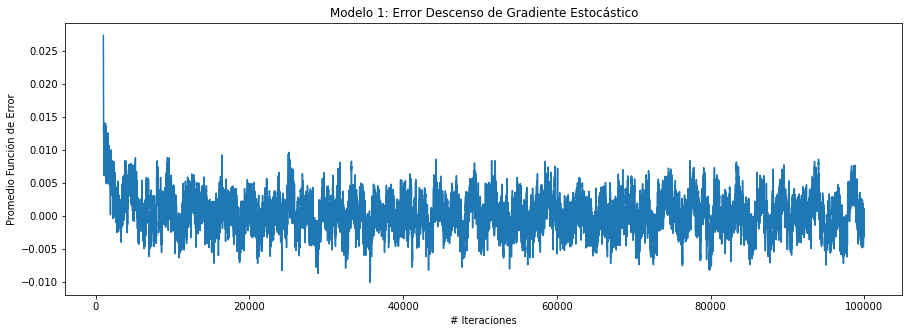

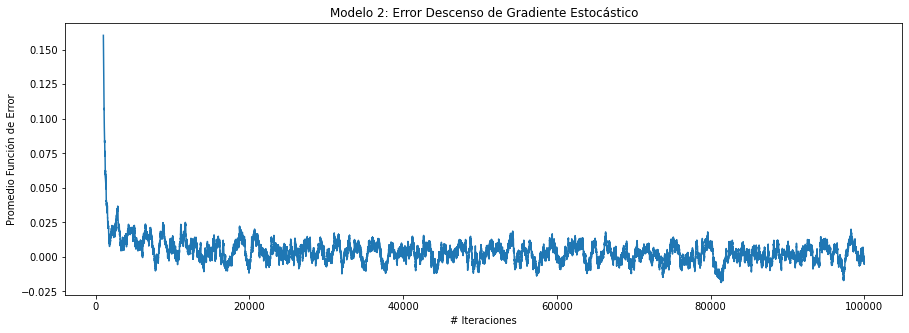

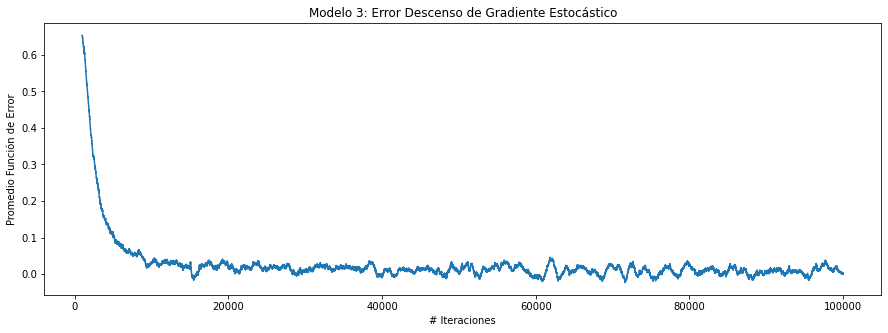

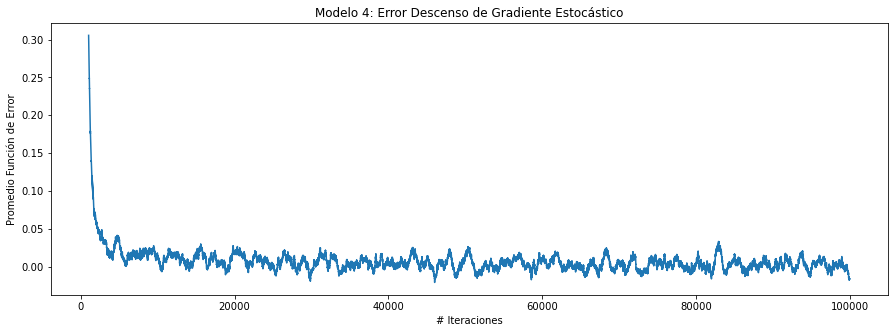

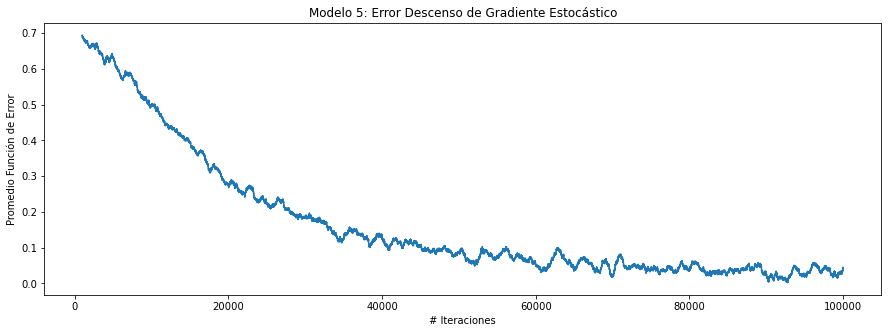

In [73]:
counter = 1
for i in errores_list:
    # Se calcula el promedio móvil
    rll_avg = pd.DataFrame(i).rolling(1000).mean()

    # Se gráfica el resultado
    plt.figure(figsize=(15,5))
    plt.plot(rll_avg)
    plt.xlabel('# Iteraciones')
    plt.ylabel('Promedio Función de Error')
    plt.title('Modelo ' + str(counter) + ': Error Descenso de Gradiente Estocástico')
    counter+=1

## Matrices de Confusión

A continuación se crearon las matrices de confusión para cada uno de los modelos realizados.

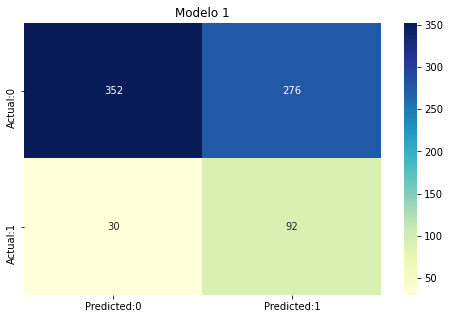

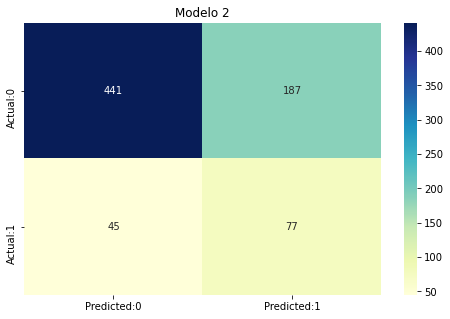

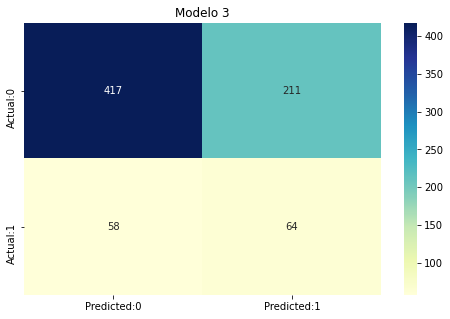

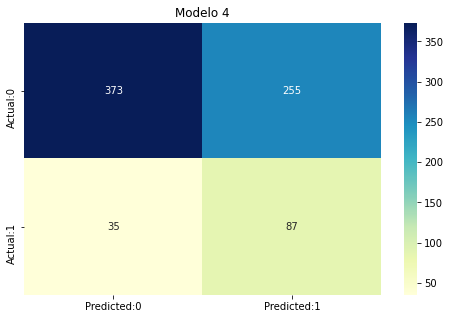

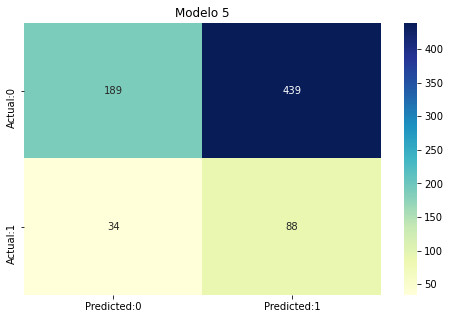

In [70]:
counter = 1
for i in tasas_preds:
    cm = confusion_matrix(y_test,i)
    conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    plt.figure(figsize = (8,5))
    plt.title("Modelo " + str(counter))
    sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
    counter+=1

## Curvas ROC
Se modelaron las curvas ROC de los modelos realizados a continuación:

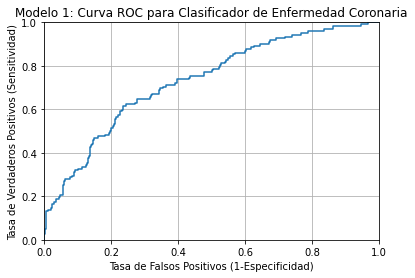

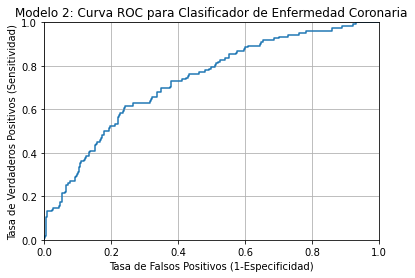

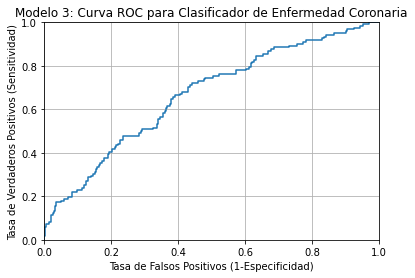

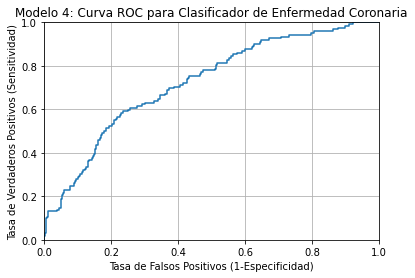

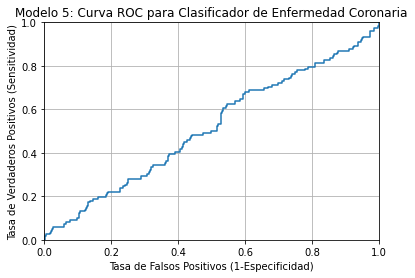

In [72]:
counter = 1
for i in probs_list:
    fpr, tpr, thresholds = roc_curve(y_test, i)
    plt.figure()
    plt.plot(fpr,tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title("Modelo " + str(counter)+ ': Curva ROC para Clasificador de Enfermedad Coronaria')
    plt.xlabel('Tasa de Falsos Positivos (1-Especificidad)')
    plt.ylabel('Tasa de Verdaderos Positivos (Sensitividad)')
    plt.grid(True)
    counter+=1

## Conclusiones
Al observar los modelos, se consiguen unas curvas ROC que se alejan (a excepción del modelo 5) de la recta de pendiente 1, que indicaría un mal modelo. Además, en los 5 modelos probados siempre se consiguió un menor número de falsos negativos que de falsos positivos. Esto se debe a que hay un menor número de personas que finalmente tienen riesgo y desarrollan la enfermedad. Esto es un aspecto positivo del modelo bajo el contexto médico en el que se está trabajando ya que se prefiere detectar más casos de riesgo y caer en el error de que en realidad no tenga, a que no se detecte el riesgo y finalmente termine enfermo. 

La dificultad que presenta este modelo es que sus datos están desbalanceados y por ello es muy difícil encontrar un modelo que prediga y clasifique mejor los datos con un menor número de errores tipo I o tipo II.

Se podría corregir este desbalanceo de datos a partir de técnicas de oversampling las cuales crean datos artificiales en la clase que posee un menor número de datos. Esto hace que se balanceen más los datos disminuyendo los errores de tipo I y II. Esta técnica podría ser recomendable para mejorar este modelo. También se podría solucionar intentando conseguir más datos de pacientes que si sean propenson a padecer la enfermedad para encontrar un mejor balance en nuestra variable objetivo.

Por otro lado, de los modelos resultantes en la parte 2 de este informe, se considera que los mejores corresponden al modelo 2 y al modelo 4. La razón de ello es que estos modelos son aquellos que tienen las mejores métricas para el caso de riesgo de enfermedad coronaria, donde se prefiere tener falsos positivos a falsos negativos (se prefiere diagnosticar una enfermedad inexistente que no diagnositicar a un paciente que si tiene la enfermedad). En específico, tales métricas son tener buen recall y buena precisión. A continuación se muestran los resultados de ambos:

- Precisión modelo 2: 0.6907 Recall: 0.6311

- Precisión modelo 4: 0.6133 Recall: 0.7131

Ambos modelos tienen métricas aceptables, y ello también es observable en sus gráficas ROC. Allí, se ve que de todos los modelos, estos dos son aquellos que se acercan más al eje de la tasa de verdaderos positivos, que sería lo deseable.



### Realizado por: Daniel Martinez y Santiago Estupiñan